In [12]:
from sklearn.metrics import mutual_info_score
from collections import deque
from adjustText import adjust_text

import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib
import seaborn as sns
import numpy as np
import scipy.stats as stats
import mysql.connector

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 사용을 위해서 세팅
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc

font_path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

import configparser

from plt_custom_def import make_gen_dict, make_pie, show_label

In [4]:
# DB 접속

config = configparser.ConfigParser()
config.read('../config.ini')
dev = config['dev']

remote = mysql.connector.connect(
    host = dev['host'],
    port = dev['port'],
    user = dev['user'],
    password = dev['password'],
    database = dev['database']
)

mycursor = remote.cursor(buffered=True)

### 1. 플라스틱 배출 비율이 높은 지역의 가구구성을 파이차트로 그려보자
- 대상 지역: 서울, 부산

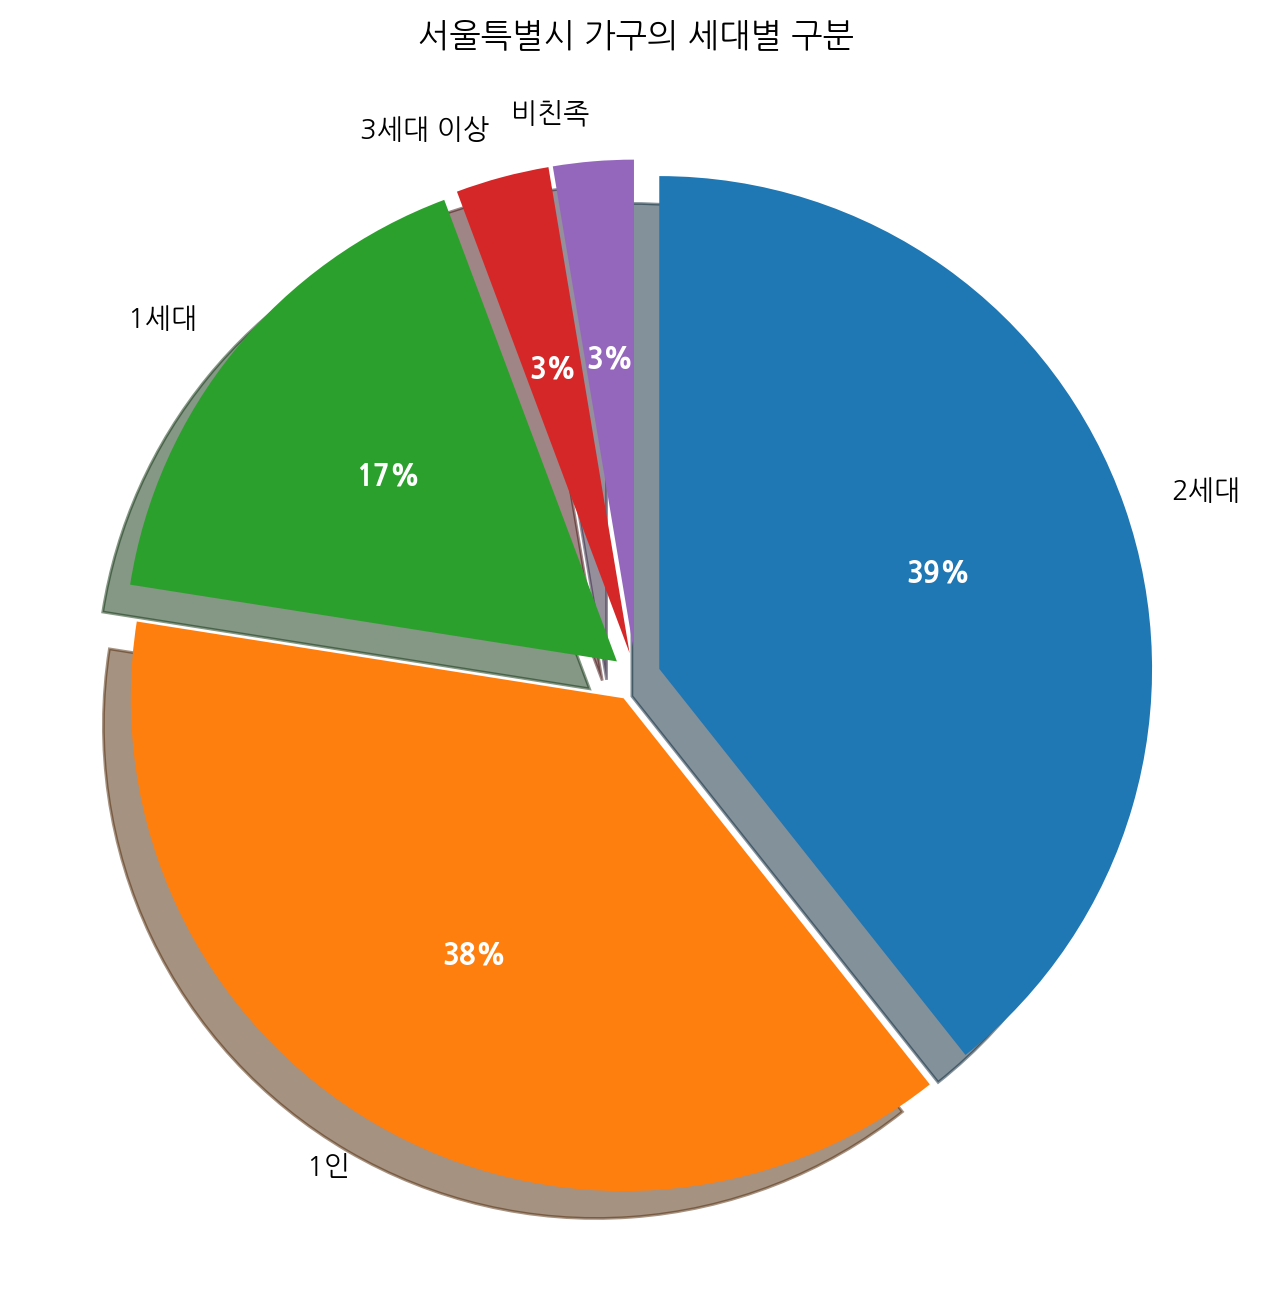

In [4]:
sql = "select * from home_generation where region_name like '%서울%'"
mycursor.execute(sql)
result = mycursor.fetchone()

gen_dict = make_gen_dict(result)
make_pie(gen_dict, '서울특별시 가구의 세대별 구분')

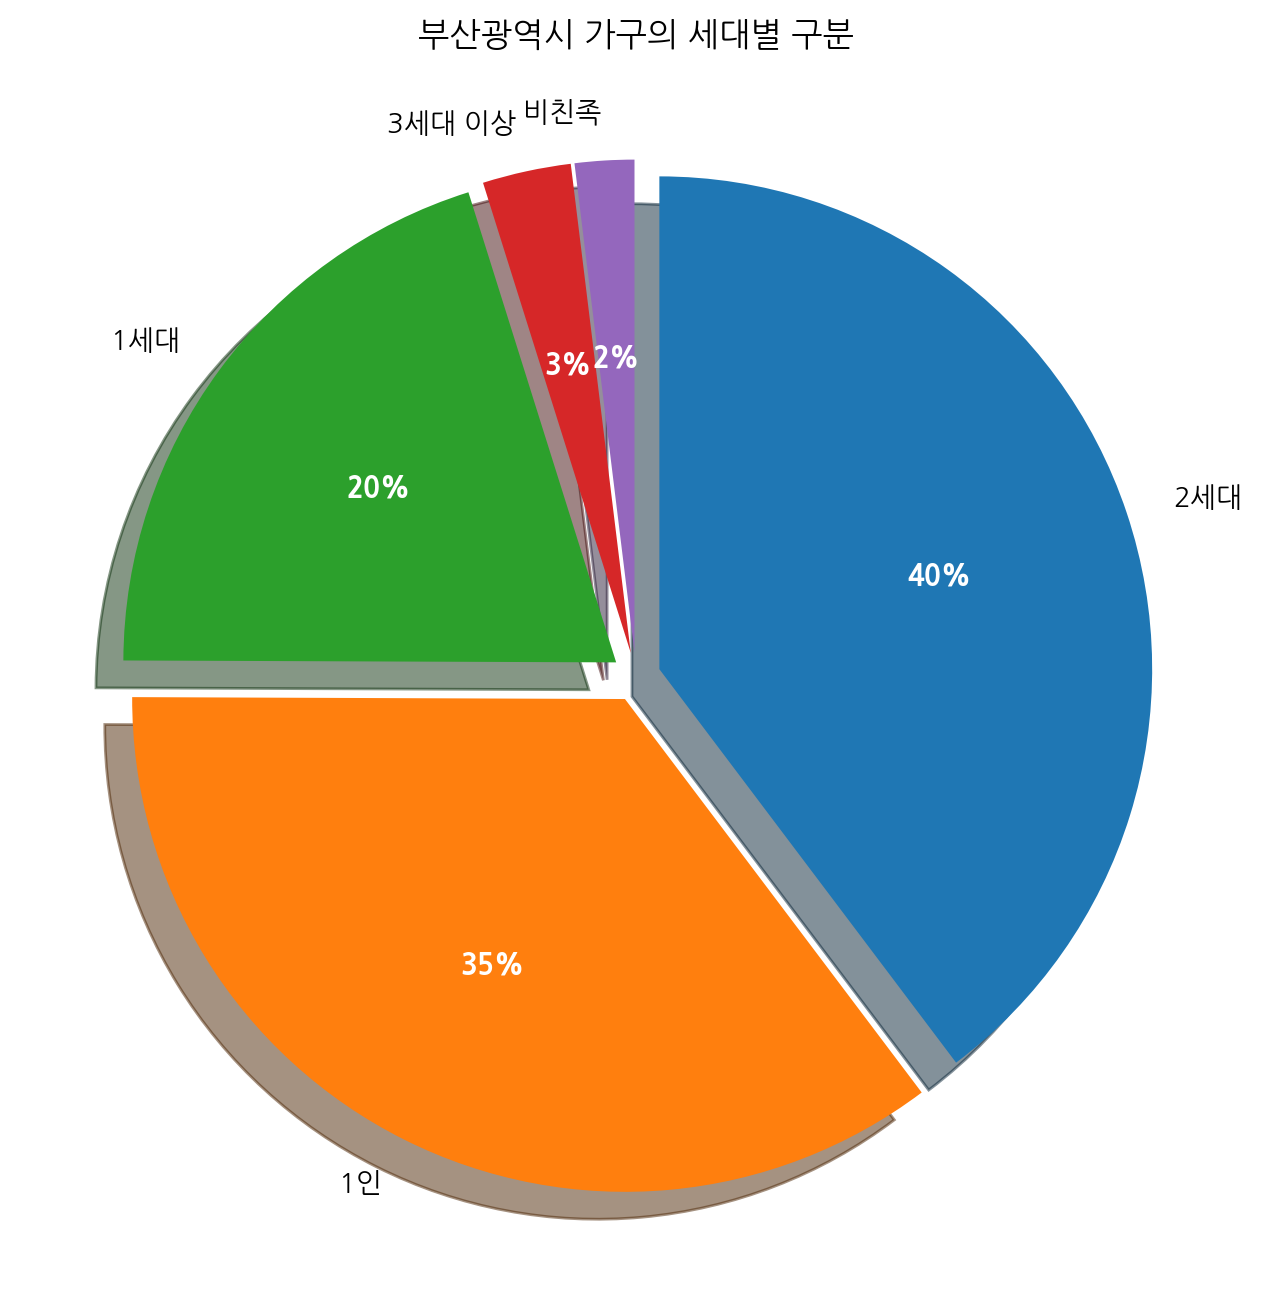

In [5]:
sql = "select * from home_generation where region_name like '%부산%'"
mycursor.execute(sql)
result = mycursor.fetchone()

gen_dict = make_gen_dict(result)
make_pie(gen_dict, '부산광역시 가구의 세대별 구분')

### 2. 플라스틱 배출 비율이 낮은 지역의 가구구성을 파이차트로 그려보자
- 대상 지역: 경북, 전북

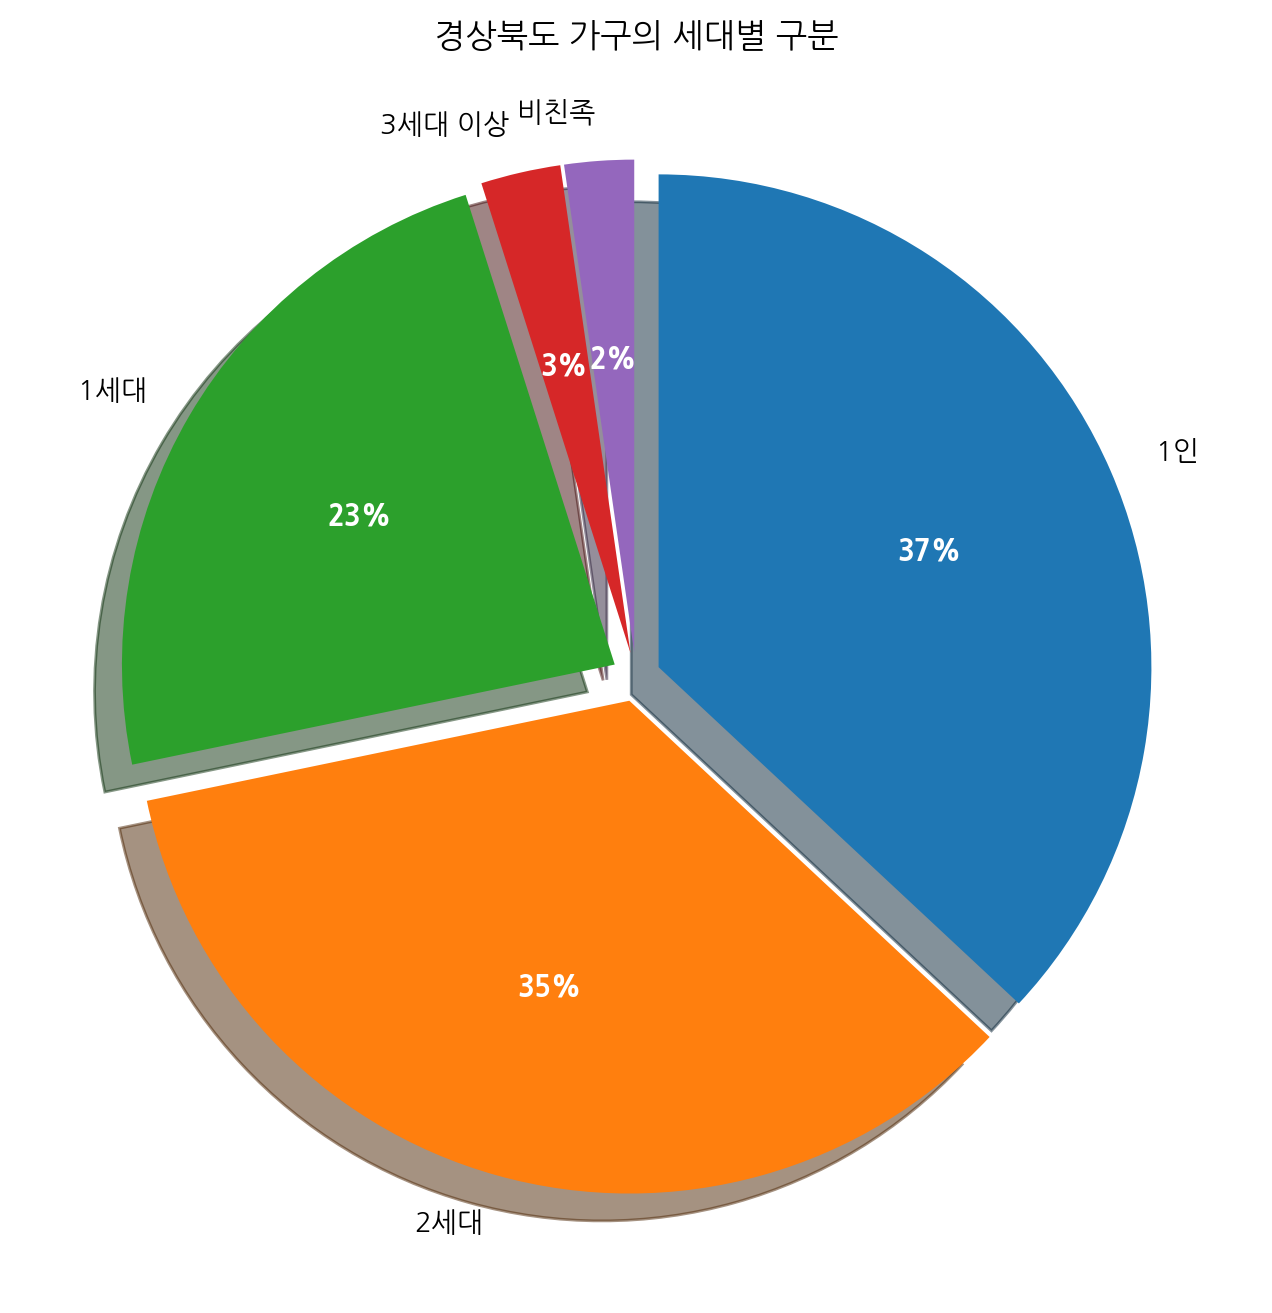

In [6]:
sql = "select * from home_generation where region_name = '경상북도'"
mycursor.execute(sql)
result = mycursor.fetchone()

gen_dict = make_gen_dict(result)

make_pie(gen_dict, '경상북도 가구의 세대별 구분')

- 플라스틱 배출 비율이 높은 2곳은 2세대가 같이 사는 비율이 가장 높다.
- 플라스틱 배출 비율이 낮은 곳은 1인 가구가 가장 많다.

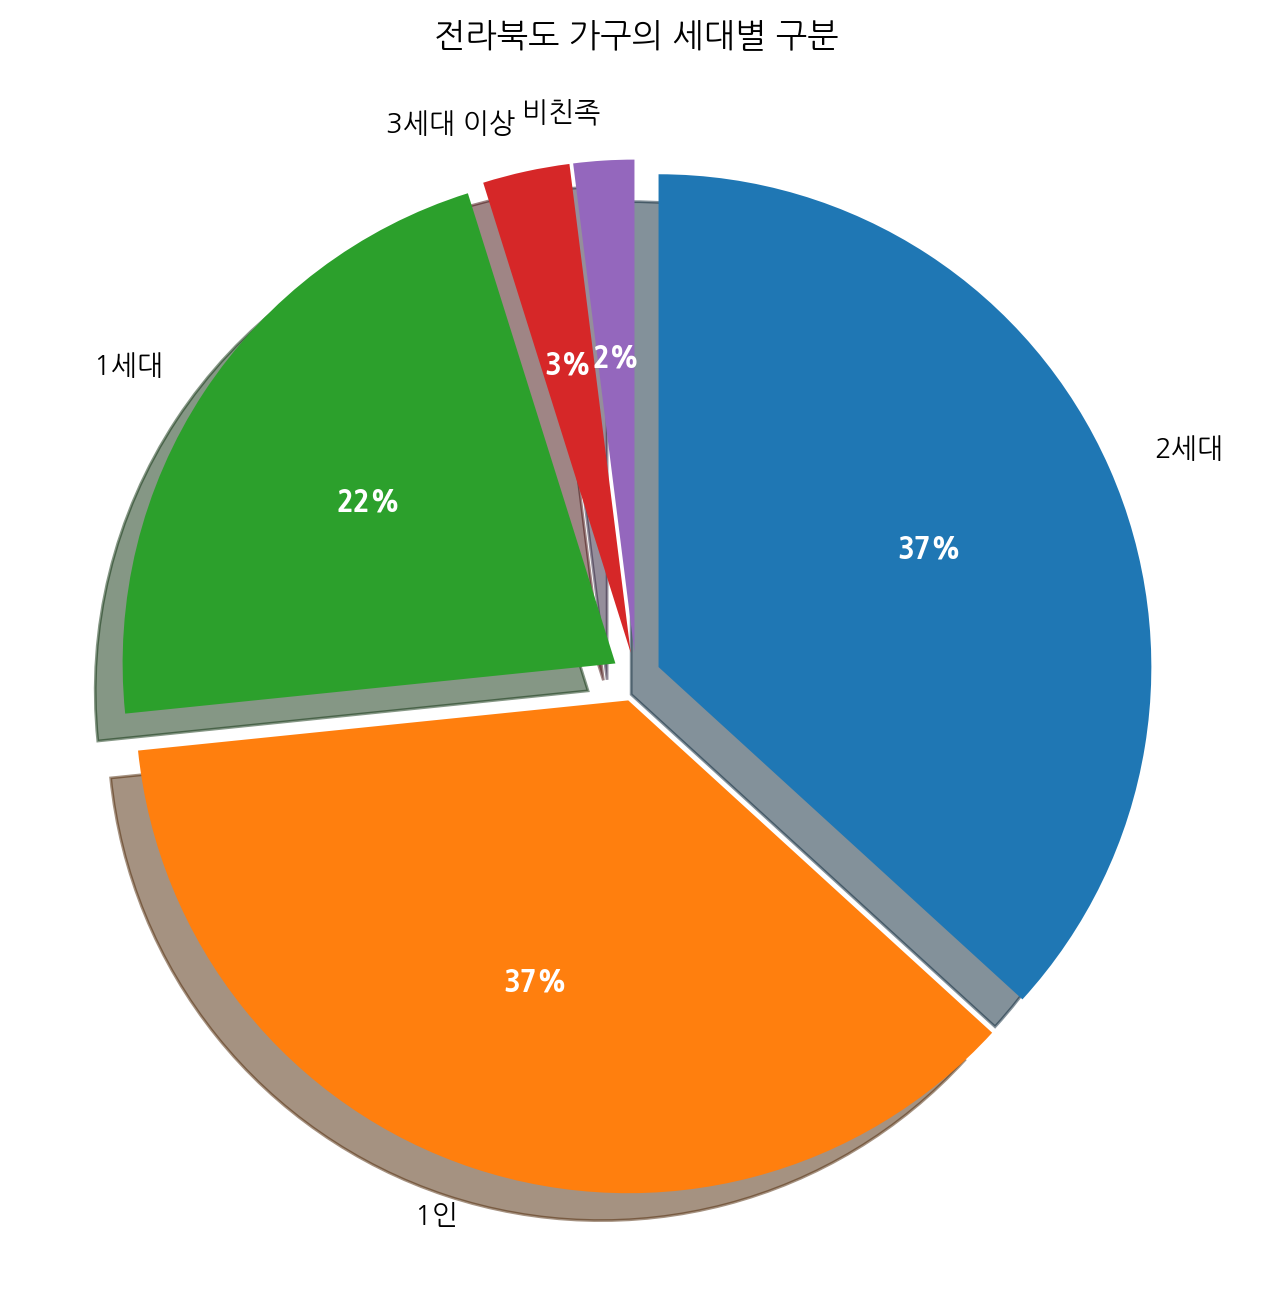

In [7]:
sql = "select * from home_generation where region_name = '전라북도'"
mycursor.execute(sql)
result = mycursor.fetchone()

gen_dict = make_gen_dict(result)

make_pie(gen_dict, '전라북도 가구의 세대별 구분')

### 3. 산점도와 상관계수
#### (1) 2세대 가구와 플라스틱 배출

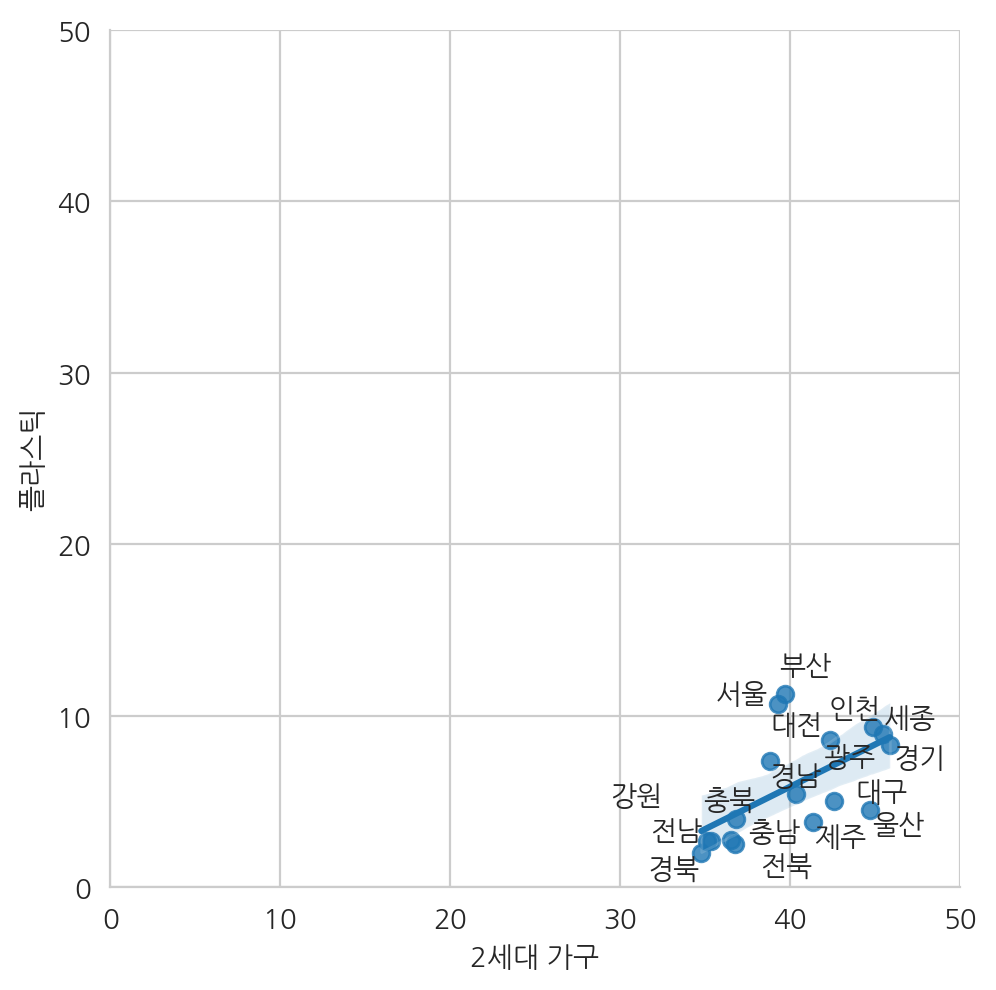

In [22]:
sql = open("07.select_two_gen_and_plastic_rate.sql").read()
mycursor.execute(sql)
result = mycursor.fetchall()

region_list = []
two_gen_list = []
plastic_list = []

for v in result:
    region_list.append(v[0])
    two_gen_list.append(float(v[1]))
    plastic_list.append(v[2])

sns_df = pd.DataFrame(data=zip(two_gen_list, plastic_list, region_list),
                      columns=['2세대 가구', '플라스틱', '지역'])

sns.lmplot(data=sns_df, x='2세대 가구', y='플라스틱')

plt.xlim(0, 50)
plt.ylim(0, 50)

texts = show_label(region_list, two_gen_list, plastic_list, 0, 0, 'center')
adjust_text(texts)

plt.show();

In [23]:
np.cov(np.array(two_gen_list, dtype=float), 
       np.array(plastic_list, dtype=float))[0,1]

7.158424316675899

In [24]:
stats.pearsonr(np.array(two_gen_list, dtype=float), 
               np.array(plastic_list, dtype=float))

PearsonRResult(statistic=0.6008538039079857, pvalue=0.01074763448965593)

- 상관계수 0.60
- p-value 0.01
- 2세대 가구가 많을수록 플라스틱 배출비율이 높다

#### (2) 세대주의 연령과 플라스틱 배출

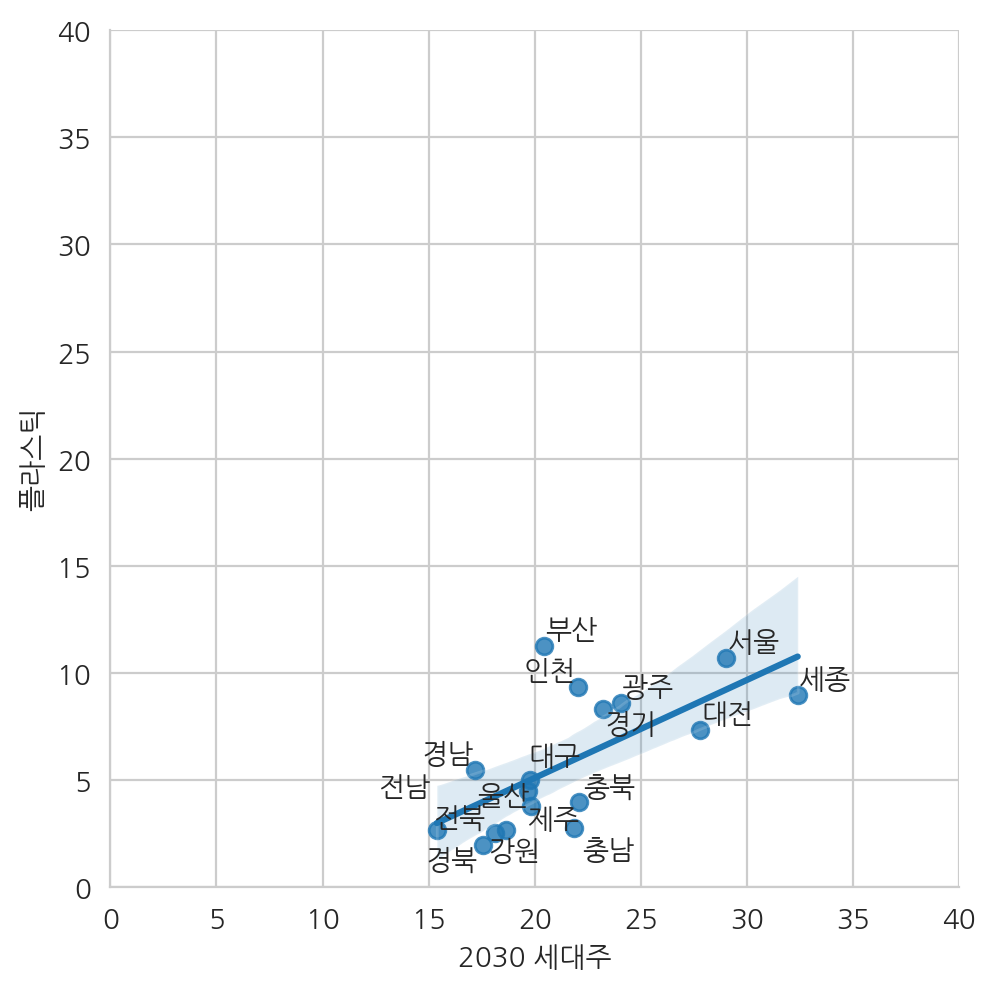

In [18]:
sql = open("08.select_young_and_plastic_rate.sql").read()
mycursor.execute(sql)
result = mycursor.fetchall()

young_owner_list = []
plastic_list = []

for v in result:
    young_owner_list.append(float(v[1]))
    plastic_list.append(v[2])

sns_df = pd.DataFrame(data=zip(young_owner_list, plastic_list, region_list),
                      columns=['2030 세대주', '플라스틱', '지역'])

sns.lmplot(data=sns_df, x='2030 세대주', y='플라스틱')

plt.xlim(0, 40)
plt.ylim(0, 40)

texts = show_label(region_list, young_owner_list, plastic_list, 0, 0, 'center')
adjust_text(texts)

plt.show();

In [15]:
np.cov(np.array(young_owner_list, dtype=float), 
       np.array(plastic_list, dtype=float))[0,1]

9.298018335393003

In [16]:
stats.pearsonr(np.array(young_owner_list, dtype=float), 
               np.array(plastic_list, dtype=float))

PearsonRResult(statistic=0.6591583582285553, pvalue=0.004000176979772876)

- 상관계수 0.65
- p-value 0.004
- 2030 세대주가 많은 지역일수록 플라스틱 배출 비율이 높다

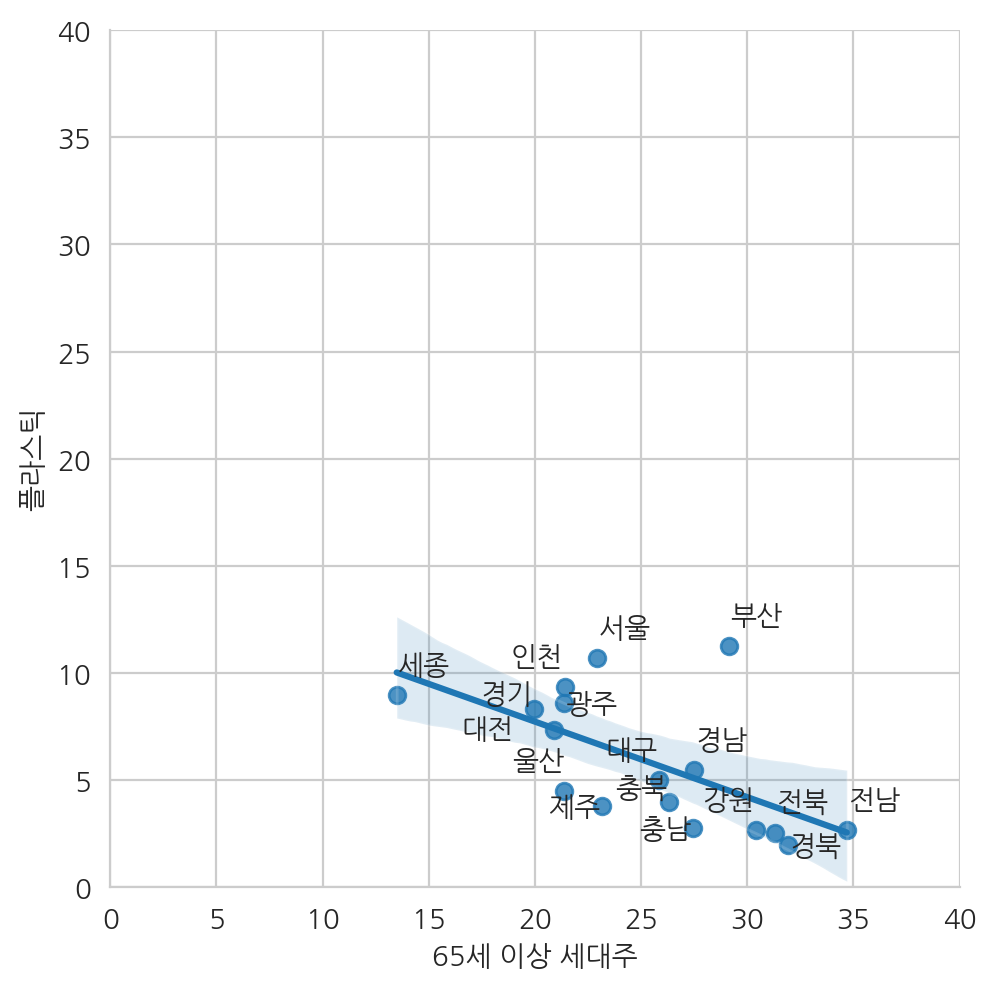

In [19]:
sql = open("10.select_silver_and_plastic_rate.sql").read()
mycursor.execute(sql)
result = mycursor.fetchall()

region_list = []
silver_owner_list = []
plastic_list = []

for v in result:
    region_list.append(v[0])
    silver_owner_list.append(float(v[1]))
    plastic_list.append(float(v[2]))

sns_df = pd.DataFrame(data=zip(silver_owner_list, plastic_list, region_list),
                      columns=['65세 이상 세대주', '플라스틱', '지역'])

sns.lmplot(data=sns_df, x='65세 이상 세대주', y='플라스틱')

plt.xlim(0, 40)
plt.ylim(0, 40)

texts = show_label(region_list, silver_owner_list, plastic_list, 0, 5, 'center')
adjust_text(texts)

plt.show();

In [20]:
np.cov(np.array(silver_owner_list, dtype=float), 
       np.array(plastic_list, dtype=float))[0,1]

-10.188147469869145

In [21]:
stats.pearsonr(np.array(silver_owner_list, dtype=float), 
               np.array(plastic_list, dtype=float))

PearsonRResult(statistic=-0.6057930609059702, pvalue=0.009955247837363772)

- 상관계수 -0.60
- p-value 0.009
- 세대주가 65세 이상인 가구 비율이 높은 지역일수록 플라스틱 배출 비율이 낮다.

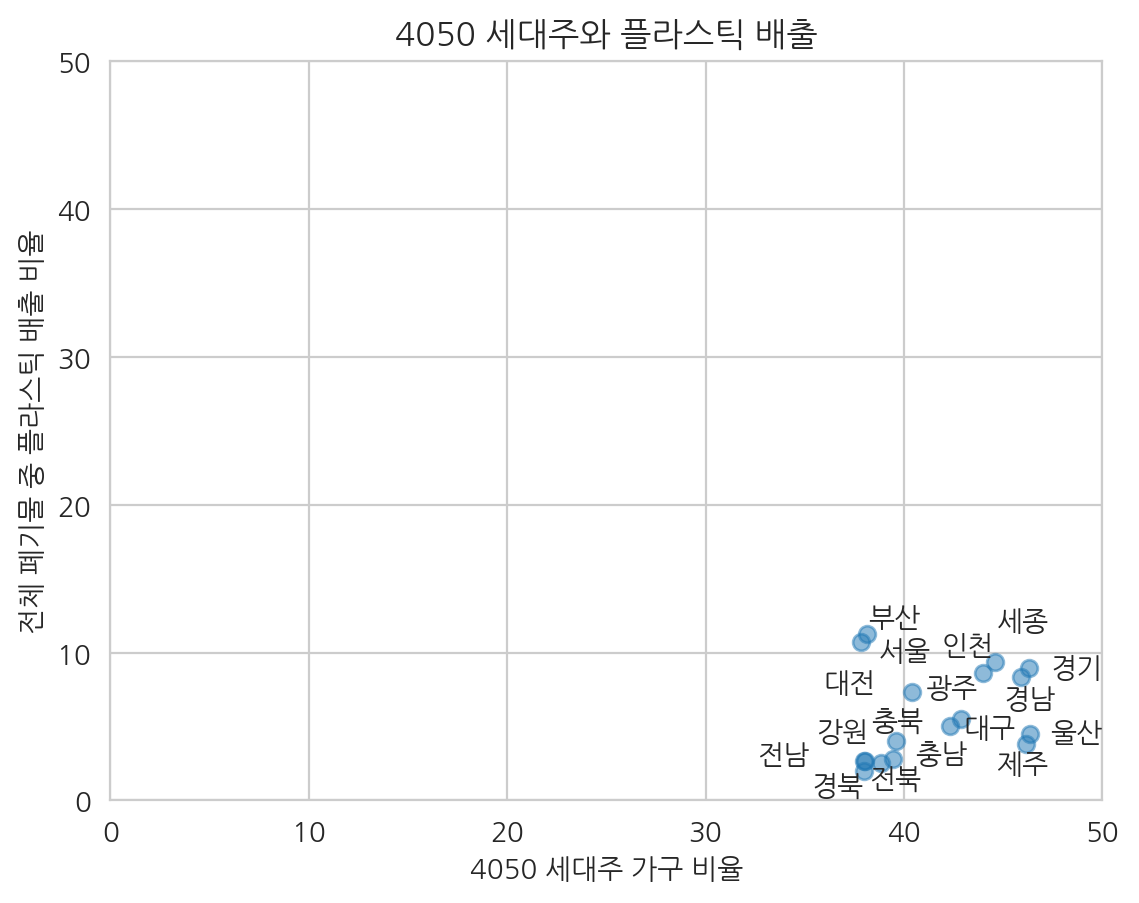

In [25]:
# cf. 4050
sql = open("09.select_older_and_plastic_rate.sql").read()
mycursor.execute(sql)
result = mycursor.fetchall()

region_list = []
older_owner_list = []
plastic_list = []

for v in result:
    region_list.append(v[0])
    older_owner_list.append(v[1])
    plastic_list.append(v[2])

plt.xlim(0, 50)
plt.ylim(0, 50)
plt.scatter(older_owner_list, plastic_list, alpha=0.5)
texts = show_label(region_list, older_owner_list, plastic_list, 0, 0, 'center')
adjust_text(texts)
plt.title('4050 세대주와 플라스틱 배출')
plt.xlabel('4050 세대주 가구 비율')
plt.ylabel('전체 폐기물 중 플라스틱 배출 비율')
plt.show();

In [26]:
np.cov(np.array(older_owner_list, dtype=float), 
       np.array(plastic_list, dtype=float))[0,1]

2.6710415080182055

In [27]:
stats.pearsonr(np.array(older_owner_list, dtype=float), 
               np.array(plastic_list, dtype=float))

PearsonRResult(statistic=0.25223670123593267, pvalue=0.32871884761838177)

- 상관계수 0.25
- p-value 0.32
- 4050 세대주 비율은 플라스틱 배출에 영향이 없는 변수로 보인다.

#### (3) 1인 가구

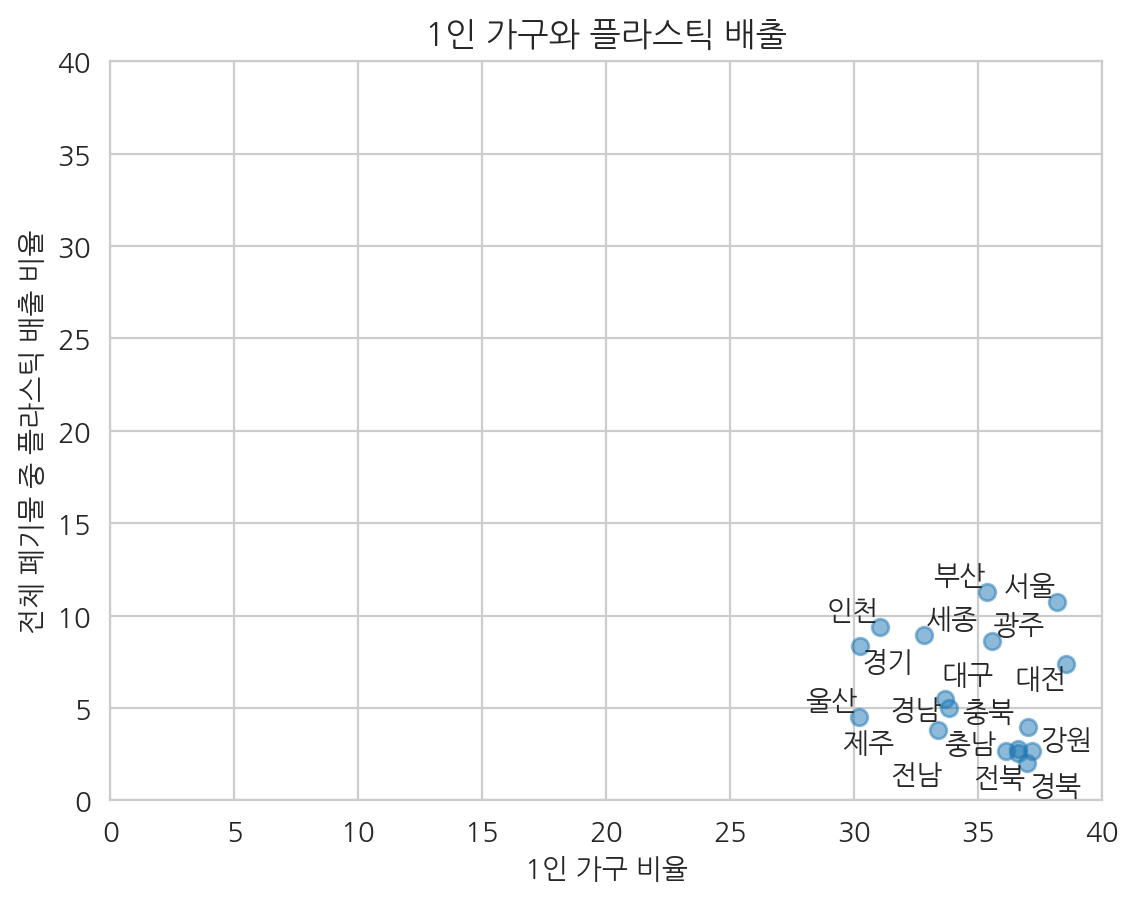

In [28]:
sql = open("11.select_single_and_plastic_rate.sql").read()
mycursor.execute(sql)
result = mycursor.fetchall()

region_list = []
single_list = []
plastic_list = []

for v in result:
    region_list.append(v[0])
    single_list.append(float(v[1]))
    plastic_list.append(float(v[2]))

plt.xlim(0, 40)
plt.ylim(0, 40)

plt.scatter(single_list, plastic_list, alpha=0.5)
texts = show_label(region_list, single_list, plastic_list, 0, 0, 'center')
adjust_text(texts)
plt.title('1인 가구와 플라스틱 배출')
plt.xlabel('1인 가구 비율')
plt.ylabel('전체 폐기물 중 플라스틱 배출 비율')

plt.show();

In [29]:
np.cov(np.array(single_list, dtype=float), 
       np.array(plastic_list, dtype=float))[0,1]

-1.80668688474861

In [30]:
stats.pearsonr(np.array(silver_owner_list, dtype=float), 
               np.array(plastic_list, dtype=float))

PearsonRResult(statistic=-0.6057930609059702, pvalue=0.009955247837363772)

- 수치로 봤을 때는 음의 상관관계가 있고, 산점도(scatter plot)에서는 상관관계가 없는 것처럼 보인다.
- 1인 가구 비율이 높은 곳 중 고령 1인 가구 비율이 높은 곳이 많아서가 아닐까?
- 1인 가구 여부보다는 세대주의 연령이 플라스틱 배출에 더 영향이 있는 것으로 보인다.

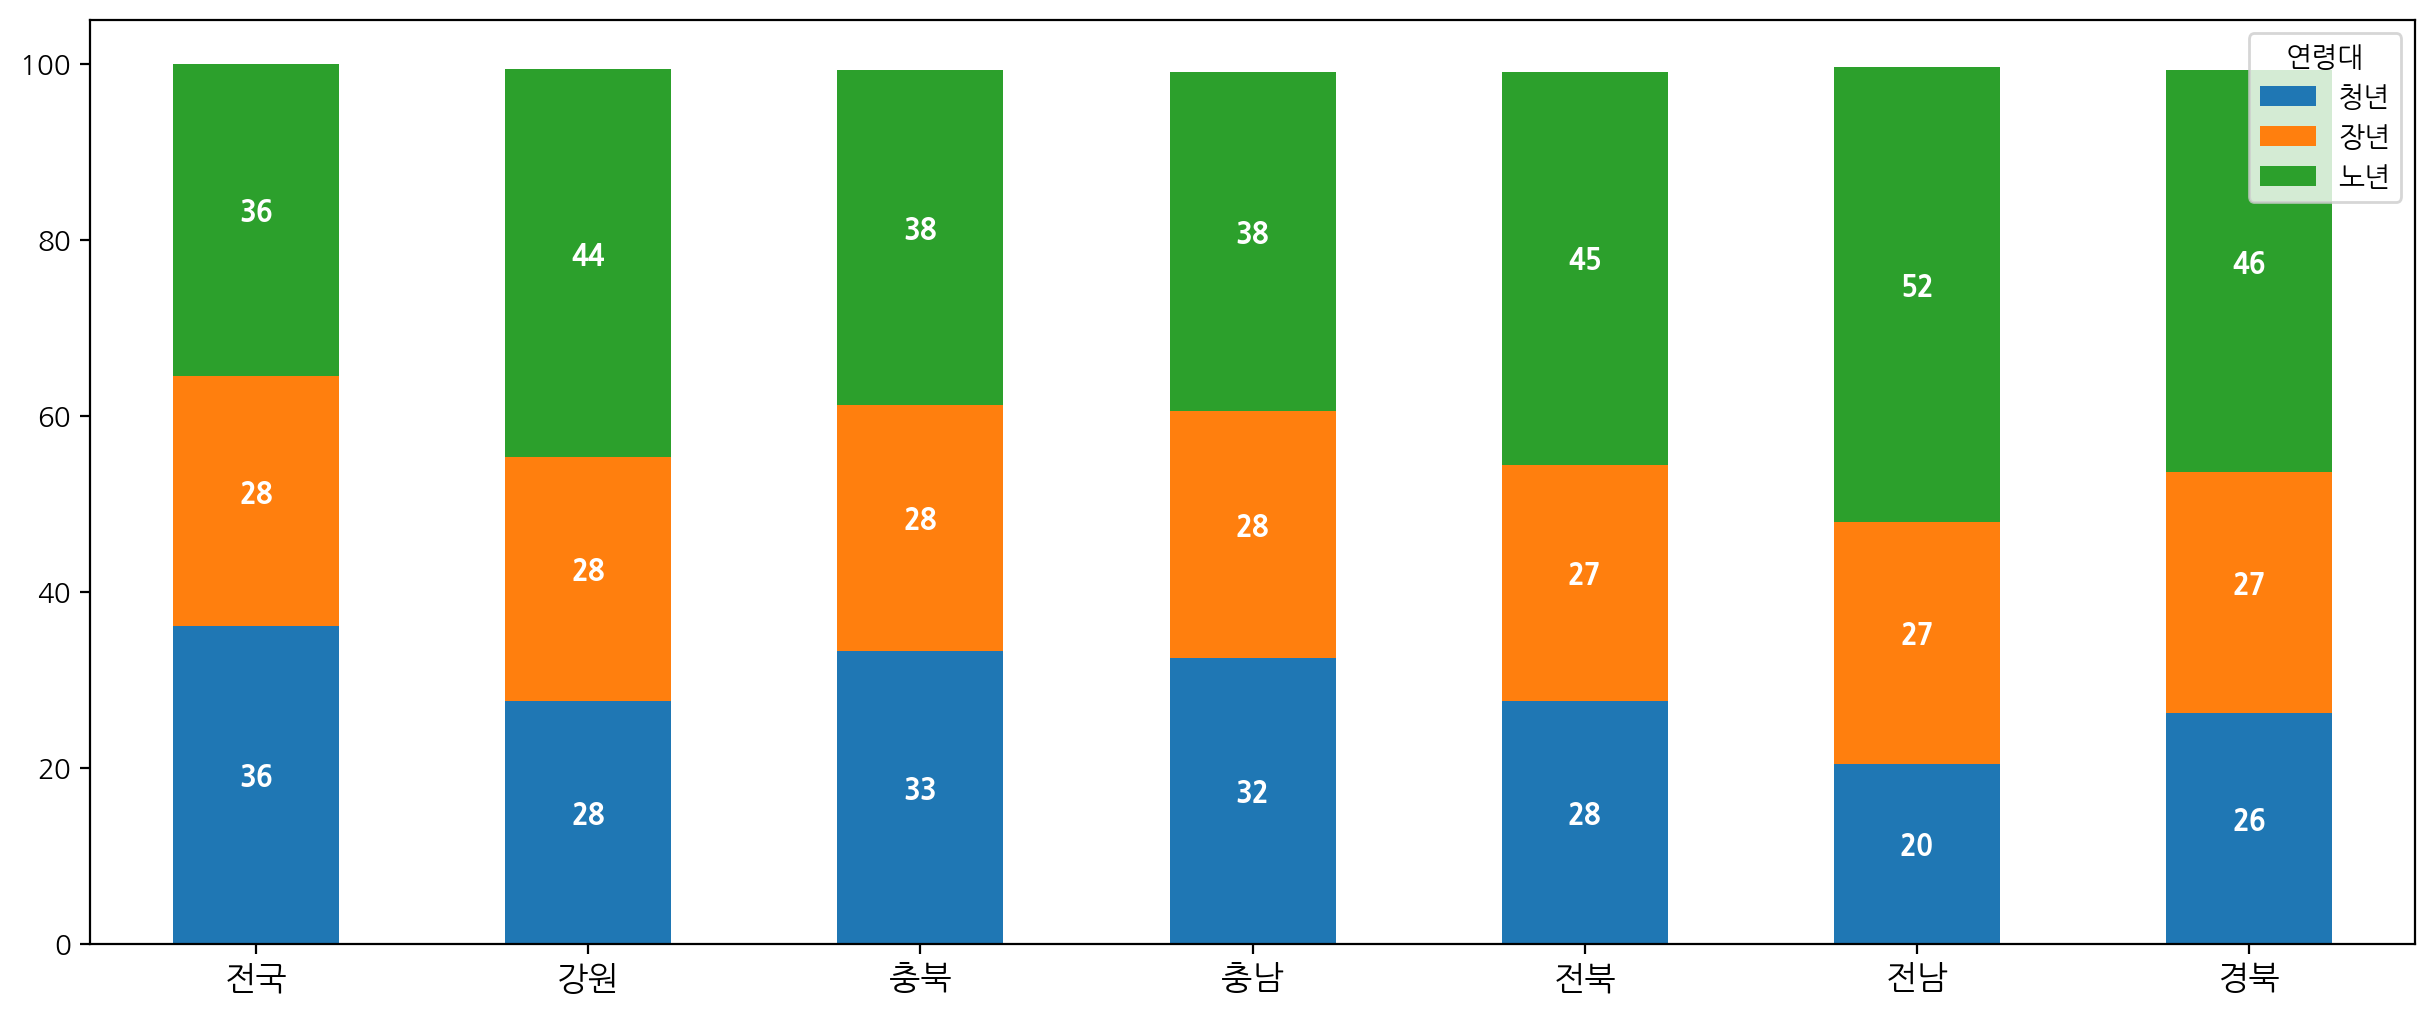

In [35]:
# plt.rcdefaults()

# 지역별 1인 가구
sql = open("12.select_single_group_by.sql").read()
mycursor.execute(sql)
result = mycursor.fetchall()

single_df = pd.DataFrame(result, columns=mycursor.column_names)
plastic_low_region = ['충북', '충남', '전남', '전북', '강원', '경북']
plastic_low_df = single_df[single_df['region'].isin(plastic_low_region)]
plastic_low_df = pd.pivot_table(plastic_low_df, index='region', columns='age_group', values='age_rate', sort=False)

# 전국 1인 가구 (데이터 처리 시 전국을 안 뺐으면 그냥 한 줄인데 ^^)
sql = open("13.select_kr_single.sql").read()
mycursor.execute(sql)
result = mycursor.fetchall()

single_kr_df = pd.DataFrame(result, columns=mycursor.column_names)
single_kr_df = pd.pivot_table(single_kr_df, index='region', columns='age_group', values='age_rate')

kr_and_region_df = pd.concat([single_kr_df, plastic_low_df])
kr_and_region_df['청년'] = kr_and_region_df[20] + kr_and_region_df[30]
kr_and_region_df['장년'] = kr_and_region_df[40] + kr_and_region_df[50]
kr_and_region_df['노년'] = kr_and_region_df[60] + kr_and_region_df[65]

kr_and_region_df = kr_and_region_df.iloc[:, 6:]

ax = kr_and_region_df.plot(kind='bar', stacked=True, figsize=(15, 6))

# 텍스트 표시
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2 + bar.get_y(),
        round(bar.get_height()),
        ha='center',
        color='w',
        weight='bold',
        size=10
    )

plt.legend(title='연령대', loc='upper right')
plt.xticks(rotation=0, size=12)
plt.xlabel('');

- 1인 가구 비율이 높은데 플라스틱 사용률이 낮은 지역의 경우
    - 전국 평균에 비해 청년층 비율이 적고 노년층 비율이 많다

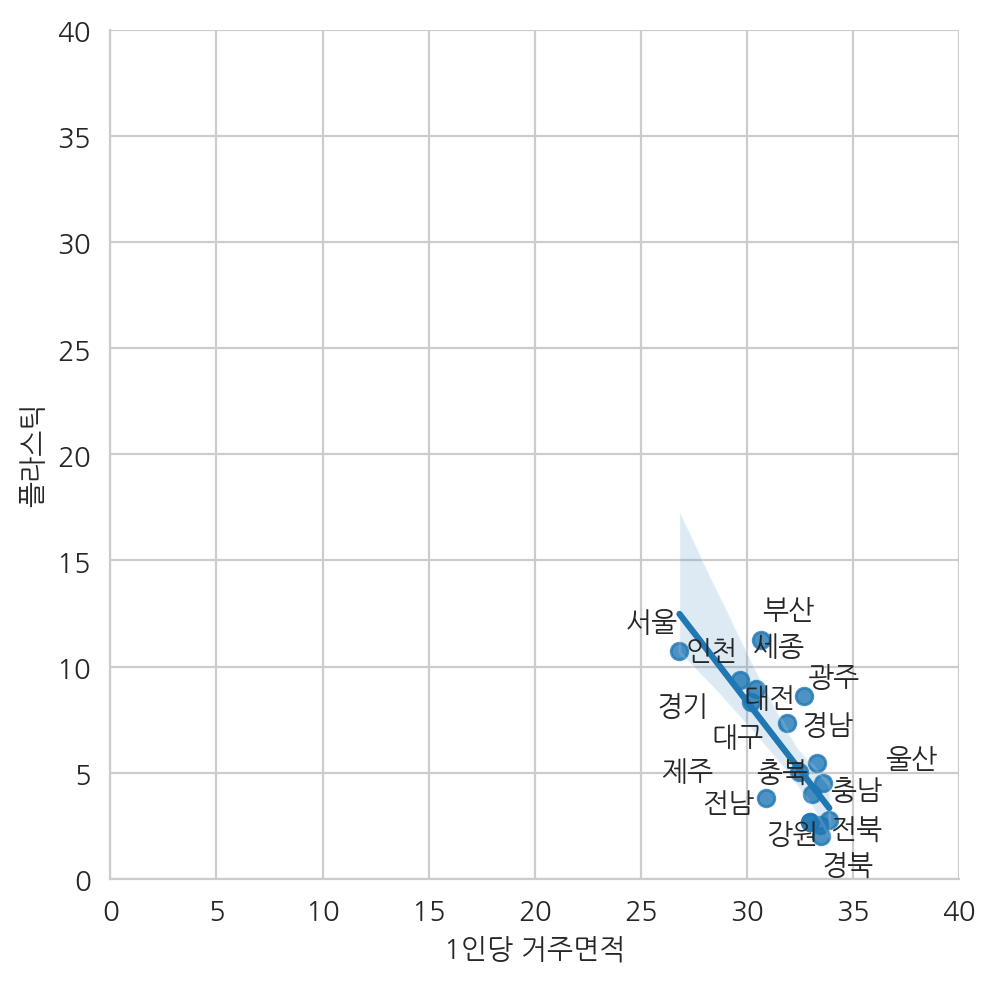

In [13]:
sql = open('15.select_space_and_plastic_rate.sql').read()
mycursor.execute(sql)
result = mycursor.fetchall()

region_list = []
space_list = []
plastic_rate_list = []

for v in result:
    region_list.append(v[0])
    space_list.append(float(v[1]))
    plastic_rate_list.append(float(v[2]))

sns_df = pd.DataFrame(data=zip(space_list, plastic_rate_list, region_list),
                      columns=['1인당 거주면적', '플라스틱', '지역'])

# sns.set_style('whitegrid')
sns.lmplot(data=sns_df, x='1인당 거주면적', y='플라스틱')

plt.xlim(0, 40)
plt.ylim(0, 40)

texts = show_label(region_list, space_list, plastic_rate_list, 0, 5, 'center')
adjust_text(texts)

plt.show();

-4.584592903739336

In [15]:
# 상관계수, p-value
stats.pearsonr(np.array(space_list, dtype=float), 
               np.array(plastic_rate_list, dtype=float))

PearsonRResult(statistic=-0.7793280656036016, pvalue=0.0002262820351627319)